In [1]:
import xarray as xr, matplotlib.pyplot as plt, numpy as np
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import cartopy.crs as ccrs # to add in continents and change map projections 
from matplotlib.colors import LinearSegmentedColormap # to change colour bar????

In [2]:
# load rainfall and temperature data files from historical runs of BCC model
ds = xr.open_dataset('/g/data/lp01/CMIP6/CMIP/BCC/BCC-CSM2-MR/historical/r1i1p1f1/Amon/pr/gr1.5/v20181126/pr_Amon_BCC-CSM2-MR_historical_r1i1p1f1_gr1.5_185001-201412.nc')
ds2 = xr.open_dataset('/g/data/lp01/CMIP6/CMIP/BCC/BCC-CSM2-MR/historical/r1i1p1f1/Amon/ts/gr1.5/v20181126/ts_Amon_BCC-CSM2-MR_historical_r1i1p1f1_gr1.5_185001-201412.nc')

In [3]:
# convert units
pr = ds.pr *86400 #convert units to mm/day
ts = ds2.ts - 273 # convert units from K to C

In [4]:
# select data from Australia region
pr_aus = pr.sel(lat=slice(-50,-5), lon=slice(110,160))
ts_aus = ts.sel(lat=slice(-50,-5), lon=slice(110,160))

In [5]:
# calculate means
pr_aus_mon = pr_aus.resample(time='M').mean(dim='time') # takes the monthly mean
pr_aus_ann = pr_aus.resample(time='Y').mean(dim='time') # takes the annual mean

ts_aus_mon = ts_aus.resample(time='M').mean(dim='time') # takes the monthly mean
ts_aus_ann = ts_aus.resample(time='Y').mean(dim='time') # takes the annual mean

In [7]:
# calculate the climatology from 1850 to 2014
pr_aus_clim = pr_aus.mean(dim = 'time')

# calculate the climatology from 1850 to 2014
ts_aus_clim = ts_aus.mean(dim = 'time')

Text(0.5, 1.0, 'Annual precipitation anomalies')

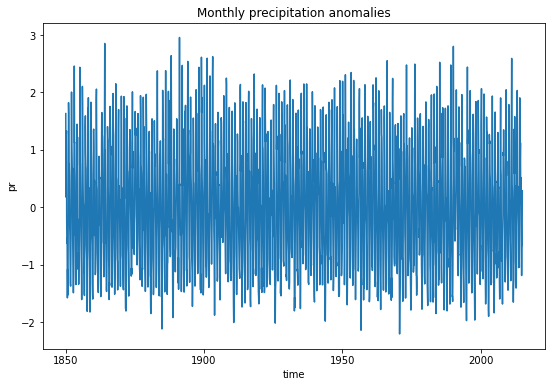

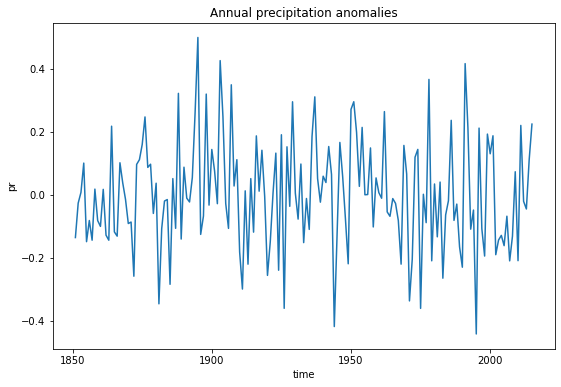

In [9]:
#calculate and plot rainfall anomalies and leave the graph colour as the default
pr_anom_mon = (pr_aus_mon - pr_aus_clim)
pr_anom_mon.mean(dim=('lat','lon')).plot(size=6)
plt.title('Monthly precipitation anomalies')

pr_anom_ann = (pr_aus_ann - pr_aus_clim)
pr_anom_ann.mean(dim=('lat','lon')).plot(size=6)
plt.title('Annual precipitation anomalies')

TypeError: When interpolating over a datetime-like coordinate, the coordinates to interpolate to must be either datetime strings or datetimes. Instead got
<xarray.IndexVariable 'time' (time: 1000)>
array([0.      , 0.001001, 0.002002, ..., 0.997998, 0.998999, 1.      ])

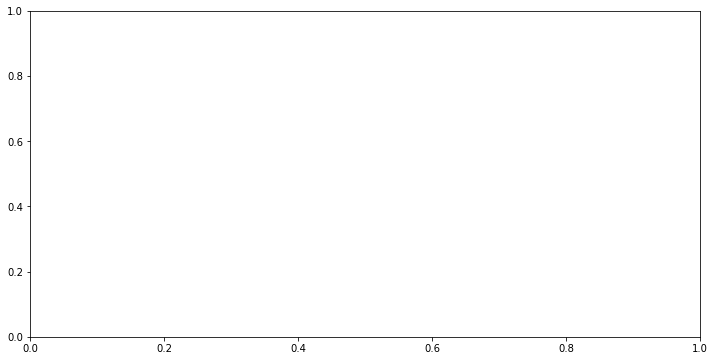

In [10]:
# temperature anomalies
# trying to make positive anomalies one colour and negative another

ts_anom_ann = (ts_aus_ann - ts_aus_clim)
mean = ts_anom_ann.mean(dim=('lat','lon'))

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1, 1, 1)
da_interp = ds.interp({'time' : np.linspace(0, 1, 1000)})
da_interp.plot(ax=ax, colour = 'red', linewidth=3)
da_interp.whhere(da_interp<0).plot(ax=ax, colour = 'red', linewidth=3)
plt.show()
plt.title('Annual temperature anomalies')